### Analysis of the Indian Liver Patient Dataset

Data analysis on the Indian Liver Patient Dataset
References:
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Comparative Study of Liver Patients from USA and INDIA: An Exploratory Analysis, International Journal of Computer Science Issues, ISSN :1694-0784, May 2012. 
* Bendi Venkata Ramana, Prof. M. S. Prasad Babu and Prof. N. B. Venkateswarlu, A Critical Study of Selected Classification Algorithms for Liver Disease Diagnosis, International Journal of Database Management Systems (IJDMS), Vol.3, No.2, ISSN : 0975-5705, PP 101-114, May 2011.

Link for details of the data: https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

* Using confidence intervals I determined features for which I can state with confidence of 95% that the healthy population mean is larger/smaller than the disease population mean. 
* I Drew histograms for each numerical feature. I used MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, I calculated correlations. For select pairs, with significant correlations, I drew joint plot with marginal histograms and found bivariate normal fits. I drew plots of the bivariate pdfs.
* I graphically represent significantly correlated in males and females and about healthy vs disease.
* For each numerical feature I ploted the distribution for this feature against bins of age. In each bin I provided a split violin plot, with different colors for healthy and disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import random
import scipy.stats

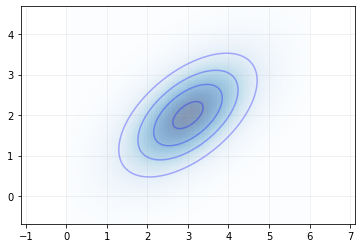

In [2]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [4]:
# read csv file to data frame:
dataset = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",header=None, usecols=np.arange(0,11))
dataset

# add titles:
titles = ['age', 'gender', 'total_bilirubin', 'direct_bilirubin', 'alkphos_ap', 'sgpt', 'sgot','total_protiens', 'albumin','a2g_ratio', 'is_liver_patient']
df = dataset.set_axis(titles, axis=1, inplace=False)
df['is_liver_patient'] = abs(df['is_liver_patient']-2)

# check for missing values in the data and impute them by using the median value of the relevant feature:
col_with_none = pd.DataFrame(df).isnull().any()
print(col_with_none)
df.a2g_ratio[df.a2g_ratio.isnull()] = df.a2g_ratio.median()


age                 False
gender              False
total_bilirubin     False
direct_bilirubin    False
alkphos_ap          False
sgpt                False
sgot                False
total_protiens      False
albumin             False
a2g_ratio            True
is_liver_patient    False
dtype: bool


C:\Users\ohad\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


##### Using confidence intervals I determined features for which I can state with confidence of 95% that the healthy population mean is larger/smaller than the disease population mean. 



In [5]:
# define df for healthy population & disease population:
df_health = df[df.is_liver_patient == 0]
df_disease = df[df.is_liver_patient == 1]

# define df with means range with confidence of 95%:
feature_to_calc = ['age', 'total_bilirubin', 'direct_bilirubin', 'alkphos_ap', 'sgpt', 'sgot','total_protiens', 'albumin','a2g_ratio']
mean_range_val_95 = pd.DataFrame(np.zeros((len(feature_to_calc),4), dtype=int),columns=['Disease Low Limit', 'Disease High Limit', 'Health Low Limit', 'Health High Limit'], index=feature_to_calc)
for feature in feature_to_calc:
    mean_range_val_95.loc[feature,'Disease Low Limit'] = df_disease[feature].mean()-1.96*(df_disease[feature].std()/np.sqrt(df_disease[feature].count()))
    mean_range_val_95.loc[feature,'Disease High Limit'] = df_disease[feature].mean()+1.96*(df_disease[feature].std()/np.sqrt(df_disease[feature].count()))
    mean_range_val_95.loc[feature,'Health Low Limit'] = df_health[feature].mean()-1.96*(df_health[feature].std()/np.sqrt(df_health[feature].count()))
    mean_range_val_95.loc[feature,'Health High Limit'] = df_health[feature].mean()+1.96*(df_health[feature].std()/np.sqrt(df_health[feature].count()))
print(mean_range_val_95)

# determine features:
feautre_higher_disease = []
feautre_higher_health = []

for feature in feature_to_calc:
    if mean_range_val_95.loc[feature,'Disease High Limit'] <= mean_range_val_95.loc[feature,'Health Low Limit']:
        feautre_higher_health += [feature]
    if mean_range_val_95.loc[feature,'Health High Limit'] <= mean_range_val_95.loc[feature,'Disease Low Limit']:
        feautre_higher_disease += [feature]
    
print('')
print('--- Summary: ---')
print('')
print('The following features mean values in healthy population are higher then in disease population:')
print(feautre_higher_health)
print('')
print('The following features mean values in disease population are higher then in healthy population:')
print(feautre_higher_disease)
print('')


                  Disease Low Limit  Disease High Limit  Health Low Limit  \
age                       44.649506           47.658187         38.661238   
total_bilirubin            3.477827            4.851019          0.990167   
direct_bilirubin           1.615384            2.231731          0.317652   
alkphos_ap               293.223651          344.790772        198.371196   
sgpt                      79.159377          120.052161         29.851801   
sgot                     105.277386          170.121653         35.166096   
total_protiens             6.353941            6.564328          6.381883   
albumin                    2.984988            3.136166          3.225450   
a2g_ratio                  0.882988            0.945522          0.985048   

                  Health High Limit  
age                       43.817804  
total_bilirubin            1.294863  
direct_bilirubin           0.475162  
alkphos_ap               241.137786  
sgpt                      37.453588  
s

## Add "blocks" graph

#####  I Drew histograms for each numerical feature. I used MLE to plot, on the same figures, fits of the distributions.

In [6]:
numerical_feature = ['age', 'total_bilirubin', 'direct_bilirubin', 'alkphos_ap', 'sgpt', 'sgot','total_protiens', 'albumin','a2g_ratio']


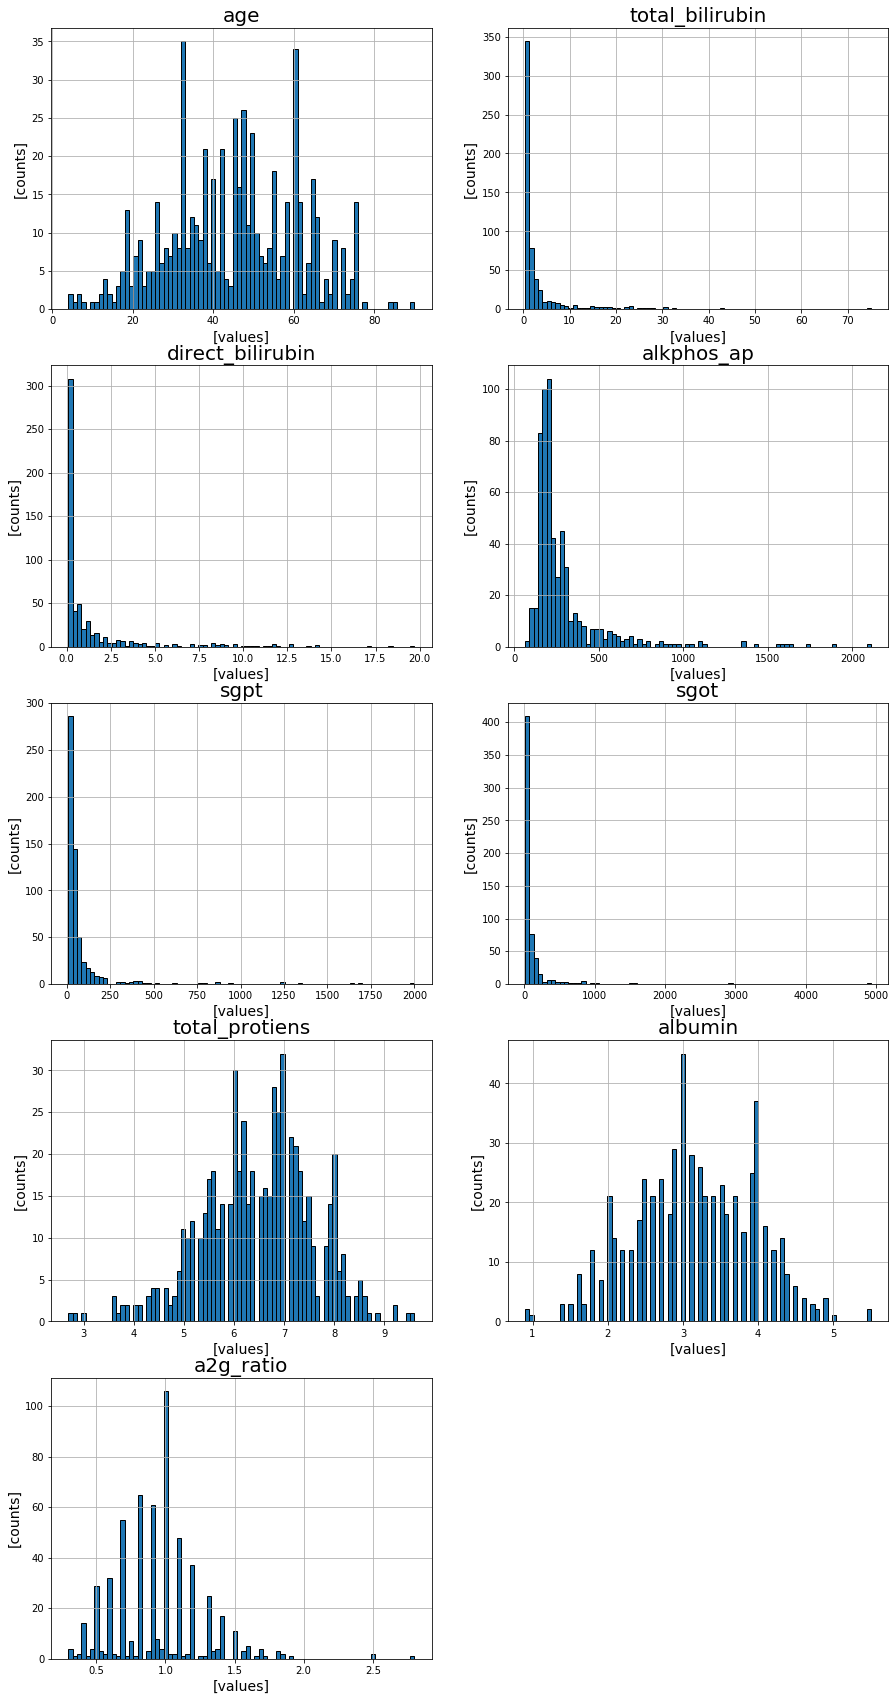

In [7]:
plt.figure(figsize=(15,30))
for i in range(len(numerical_feature)):           # for each numerical feature
    curr_feature = numerical_feature[i]           # current iteration feature         
    plt.subplot(5, 2, i+1)
    plt.hist(df[numerical_feature[i]].values, bins=80, edgecolor='black')
    plt.title(curr_feature, fontsize=20)
    plt.xlabel('[values]', fontsize=14)
    plt.ylabel('[counts]', fontsize=14)
    plt.grid()

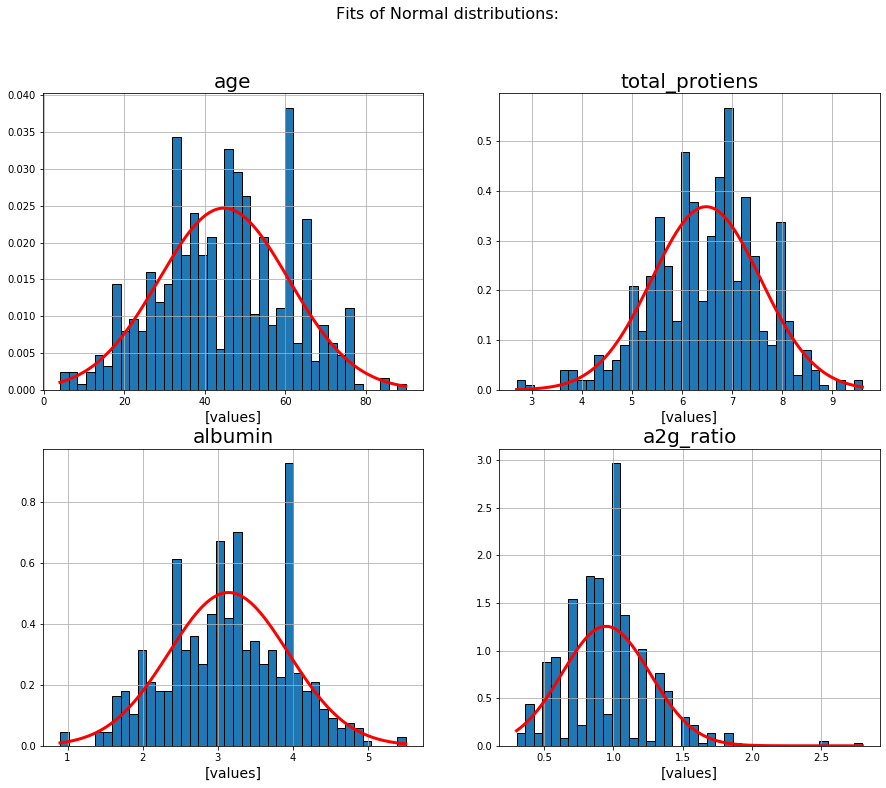

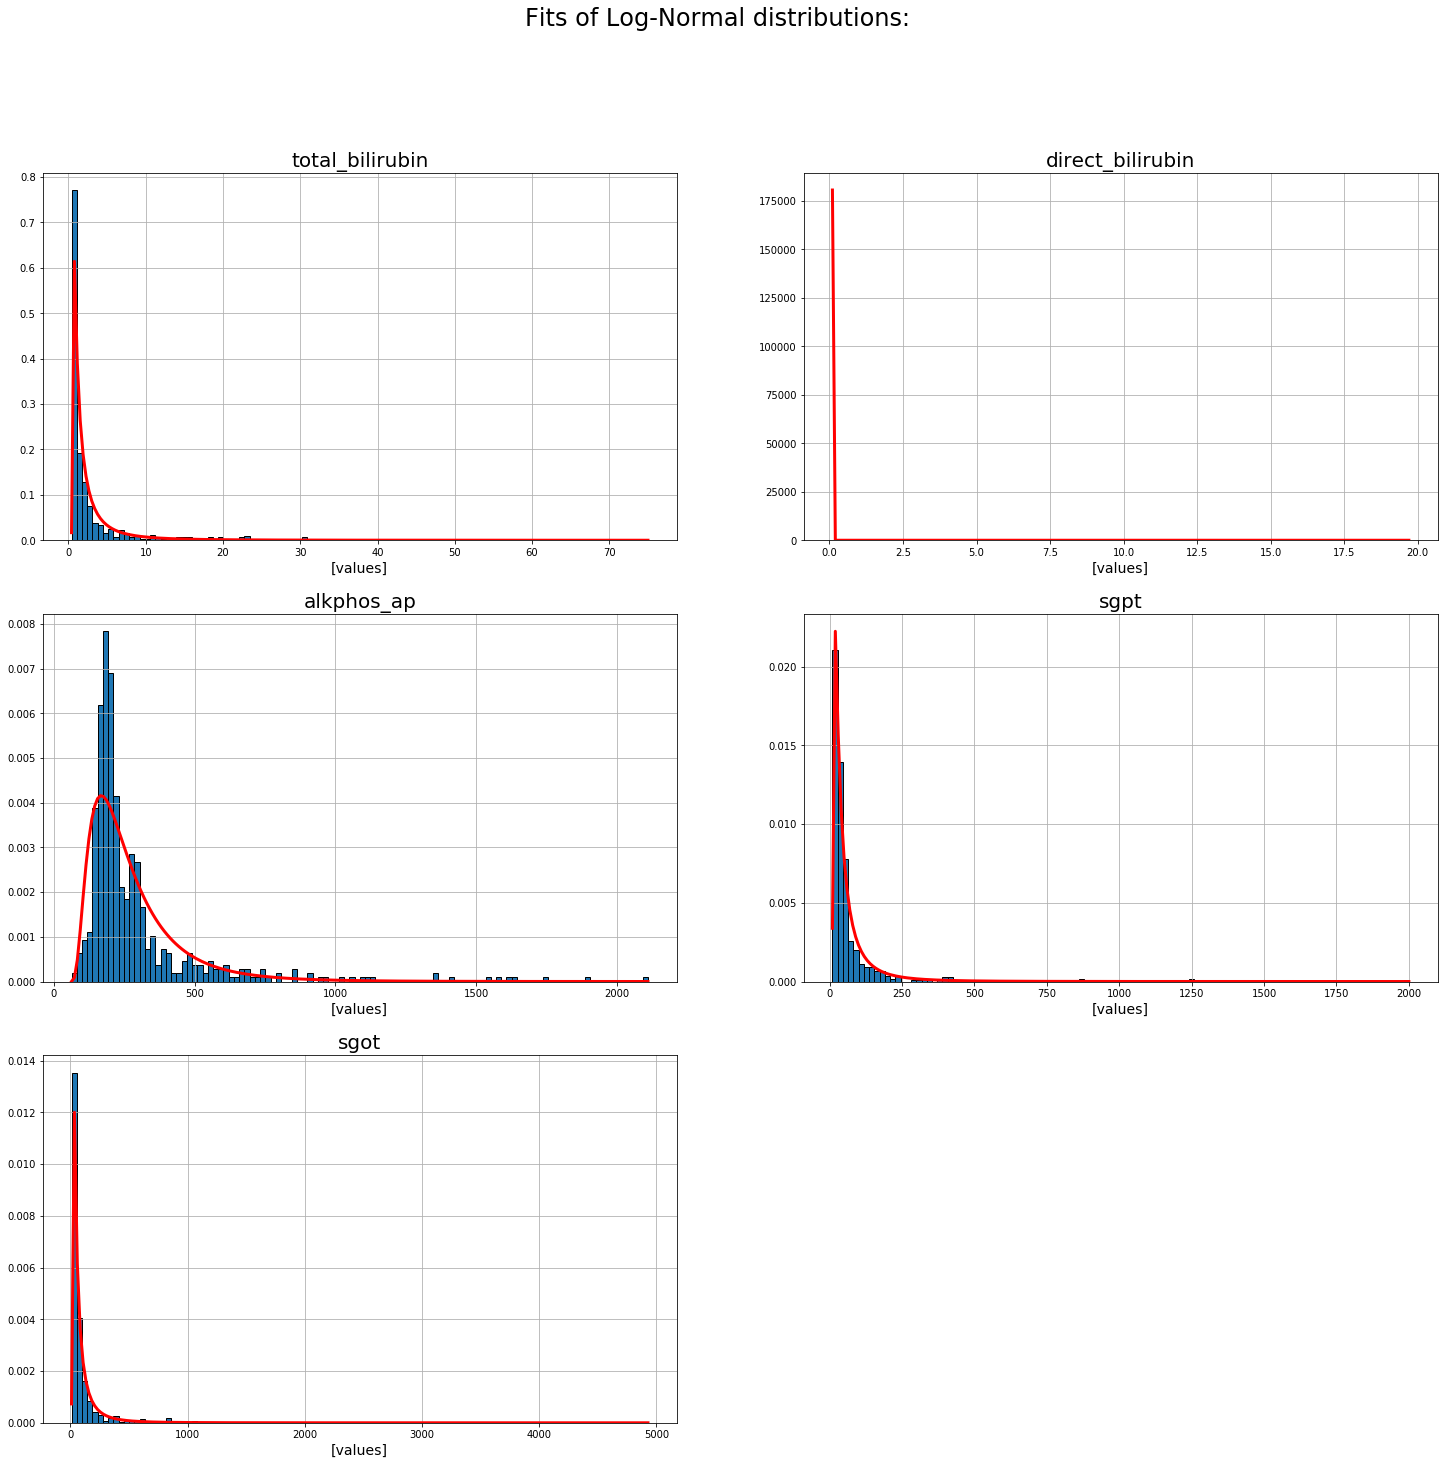

In [8]:
from scipy.stats import norm
from scipy.stats import lognorm

normal_dist_features = ['age','total_protiens', 'albumin','a2g_ratio']
lognormal_dist_features = ['total_bilirubin', 'direct_bilirubin', 'alkphos_ap', 'sgpt', 'sgot']

# normal features:
plt.figure(figsize=(15,12))
plt.suptitle("Fits of Normal distributions:", fontsize=16)
for i in range(len(normal_dist_features)):     # for each feature
    curr_feature = normal_dist_features[i]           # current iteration feature
    parameters = norm.fit(df[curr_feature].values)
    mean, std = parameters
    x_axis = np.linspace(df[curr_feature].values.min(),df[curr_feature].values.max(),200)
    pdf_fitted = norm.pdf(x_axis, loc=mean, scale=std)
    plt.subplot(2, 2, i+1)
    plt.hist(df[normal_dist_features[i]].values, bins=40, edgecolor='black', density=True)
    plt.title(curr_feature, fontsize=20)
    plt.xlabel('[values]', fontsize=14)
#     plt.ylabel('[PDF]', fontsize=14)
    plt.plot(x_axis,pdf_fitted, color='red',linewidth=3)
    plt.grid()

# log-normal features:
plt.figure(figsize=(25,23))
plt.suptitle("Fits of Log-Normal distributions:", fontsize=24)
for i in range(len(lognormal_dist_features)):     # for each feature
    curr_feature = lognormal_dist_features[i]           # current iteration feature
    parameters = lognorm.fit(df[curr_feature].values)
    scatter,std,mean = parameters
    x_axis = np.linspace(df[curr_feature].values.min(),df[curr_feature].values.max(),200)
    pdf_fitted = lognorm.pdf(x_axis, scatter,std,mean)
    plt.subplot(3, 2, i+1)
    plt.hist(df[lognormal_dist_features[i]].values, bins=110, edgecolor='black', density=True)
    plt.title(curr_feature, fontsize=20)
    plt.xlabel('[values]', fontsize=14)
#     plt.ylabel('[PDF]', fontsize=14)
    plt.plot(x_axis,pdf_fitted, color='red',linewidth=3)
    plt.grid()

#### For each pair of numerical feature, I calculated correlations. For select pairs, with significant correlations, I drew joint plot with marginal histograms and found bivariate normal fits. I drew plots of the bivariate pdfs.

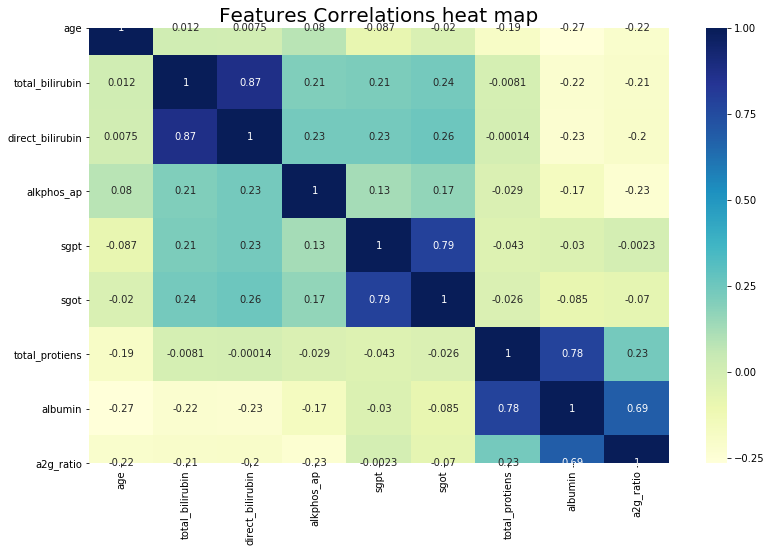

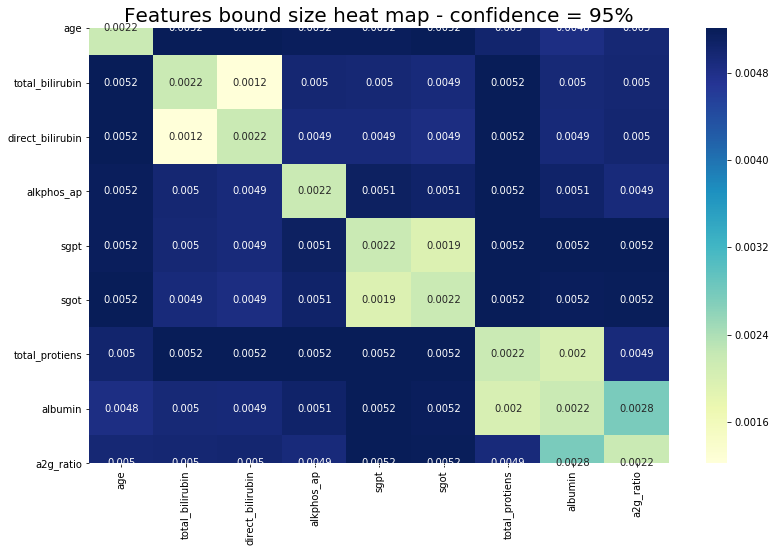

,age,total_bilirubin,direct_bilirubin,alkphos_ap,sgpt,sgot,total_protiens,albumin,a2g_ratio
age,1.000000,0.011763,0.007529,0.080599,-0.087102,-0.019912,-0.189705,-0.272473,-0.219423
total_bilirubin,0.011763,1.000000,1.352397,0.209689,0.217427,0.242474,-0.008100,-0.226022,-0.209006
direct_bilirubin,0.007529,1.352397,1.000000,0.239410,0.238305,0.263476,-0.000139,-0.232639,-0.202576
alkphos_ap,0.080599,0.209689,0.239410,1.000000,0.126348,0.168781,-0.028522,-0.166988,-0.238189
sgpt,-0.087102,0.217427,0.238305,0.126348,1.000000,1.076683,-0.042544,-0.029750,-0.002254
sgot,-0.019912,0.242474,0.263476,0.168781,1.076683,1.000000,-0.025651,-0.085498,-0.070044
total_protiens,-0.189705,-0.008100,-0.000139,-0.028522,-0.042544,-0.025651,1.000000,1.055806,0.238235
albumin,-0.272473,-0.226022,-0.232639,-0.166988,-0.029750,-0.085498,1.055806,1.000000,0.840533
a2g_ratio,-0.219423,-0.209006,-0.202576,-0.238189,-0.002254,-0.070044,0.238235,0.840533,1.000000


In [9]:
alpha = 0.95
n = len(df['age'])
df_num_var = df[numerical_feature]
corr_mat_pearson = df[numerical_feature].corr(method='pearson')
plt.figure(figsize=(13,8))
sns.heatmap(corr_mat_pearson, cmap="YlGnBu", annot=True)
plt.title('Features Correlations heat map', fontsize=20)
plt.show()

def fisher_transform(r):
    if r == 1:
        return r
    F = 0.5 * (np.log((1+r)/(1-r)))
    return F

def inv_fisher_transform(F):
    r = ((np.exp(2*F))-1)/((np.exp(2*F))+1)
    return r

bound_value = (1/(np.sqrt(n-3)))*scipy.stats.norm.ppf((1-(0.5*alpha)))
f_corr_mat = corr_mat_pearson*0
for feature in (numerical_feature):
    for test_feature in (numerical_feature):
        f_corr_mat.loc[feature,test_feature] = fisher_transform(corr_mat_pearson.loc[feature,test_feature])

bound_size_mat = corr_mat_pearson*0
for feature in (numerical_feature):
    for test_feature in (numerical_feature):
        high_b = inv_fisher_transform(f_corr_mat.loc[feature,test_feature] + bound_value)
        low_b = inv_fisher_transform(f_corr_mat.loc[feature,test_feature] - bound_value)
        bound_size_mat.loc[feature,test_feature] = high_b-low_b
        
        
plt.figure(figsize=(13,8))
sns.heatmap(bound_size_mat, cmap="YlGnBu", annot=True)
plt.title('Features bound size heat map - confidence = 95%', fontsize=20)
plt.show()
        
f_corr_mat

<Figure size 1080x1080 with 0 Axes>

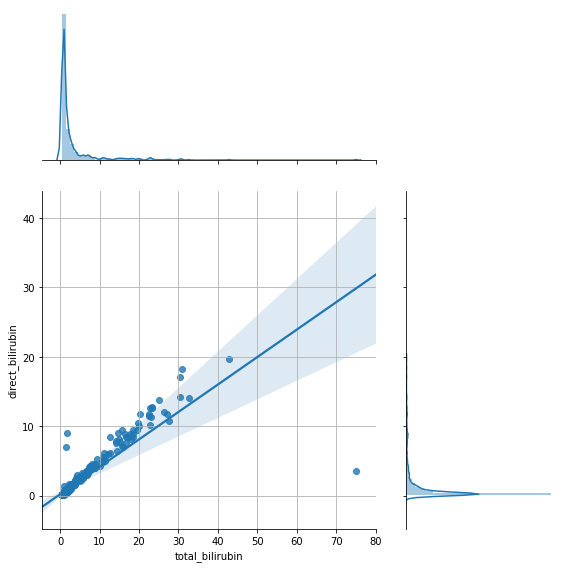

<Figure size 1080x1080 with 0 Axes>

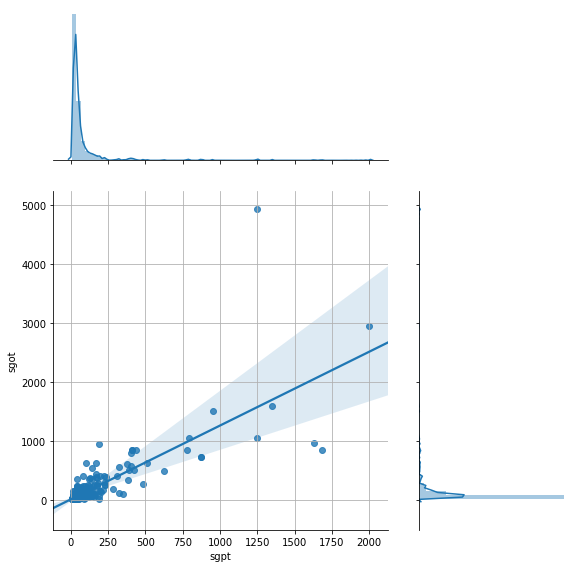

<Figure size 1080x1080 with 0 Axes>

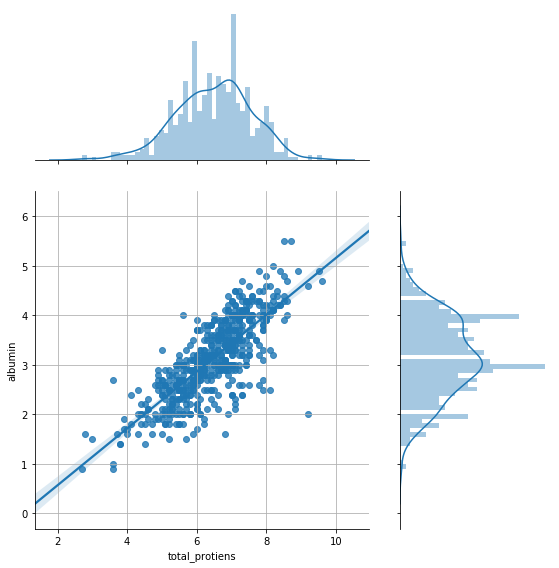

<Figure size 1080x1080 with 0 Axes>

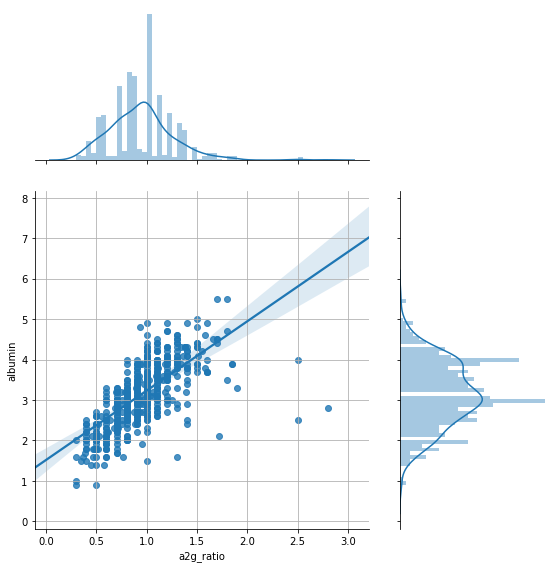

In [10]:
plt.figure(figsize=(15,15))
sns.jointplot(x='total_bilirubin',height=8, ratio=2, y='direct_bilirubin', data=df, marginal_kws=dict(bins=70), kind="reg")
plt.grid()
plt.show()

plt.figure(figsize=(15,15))
sns.jointplot(x='sgpt', y='sgot',height=8, ratio=2, data=df, marginal_kws=dict(bins=70), kind="reg")
plt.grid()
plt.show()

plt.figure(figsize=(15,15))
sns.jointplot(x='total_protiens', y='albumin',height=8, ratio=2, data=df, marginal_kws=dict(bins=50), kind="reg")
plt.grid()
plt.show()

plt.figure(figsize=(15,15))
sns.jointplot(x='a2g_ratio', y='albumin',height=8, ratio=2, data=df, marginal_kws=dict(bins=50), kind="reg")
plt.grid()
plt.show()


--- total_bilirubin Vs. direct_bilirubin: ---


C:\Users\ohad\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: No contour levels were found within the data range.


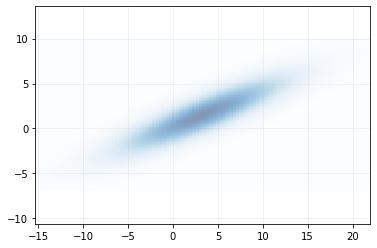


--- sgpt Vs. sgot: ---


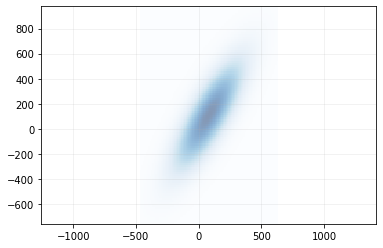


--- total_protiens Vs. albumin: ---


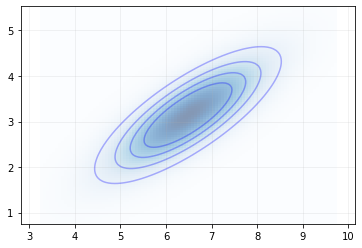


--- a2g_ratio Vs. albumin: ---


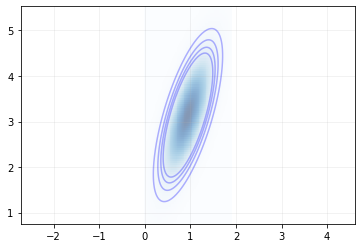

array([[0.10143912, 0.17383419],
       [0.17383419, 0.63285017]])

In [11]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()

print('')
print('--- total_bilirubin Vs. direct_bilirubin: ---')
means = [df['total_bilirubin'].mean(), df['direct_bilirubin'].mean()]
cov = np.cov((df['total_bilirubin'].values, df['direct_bilirubin'].values))
plot_2d_Gaussian_pdf(means, cov)

print('')
print('--- sgpt Vs. sgot: ---')
means = [df['sgpt'].mean(), df['sgot'].mean()]
cov = np.cov((df['sgpt'].values, df['sgot'].values))
plot_2d_Gaussian_pdf(means, cov)

print('')
print('--- total_protiens Vs. albumin: ---')
means = [df['total_protiens'].mean(), df['albumin'].mean()]
cov = np.cov((df['total_protiens'].values, df['albumin'].values))
plot_2d_Gaussian_pdf(means, cov)
print('')

print('--- a2g_ratio Vs. albumin: ---')
means = [df['a2g_ratio'].mean(), df['albumin'].mean()]
cov = np.cov((df['a2g_ratio'].values, df['albumin'].values))
plot_2d_Gaussian_pdf(means, cov)
cov

#### I graphically represent significantly correlated in males and females and about healthy vs disease.

* pairs that significantly correlated in males but not in females / Opposite:

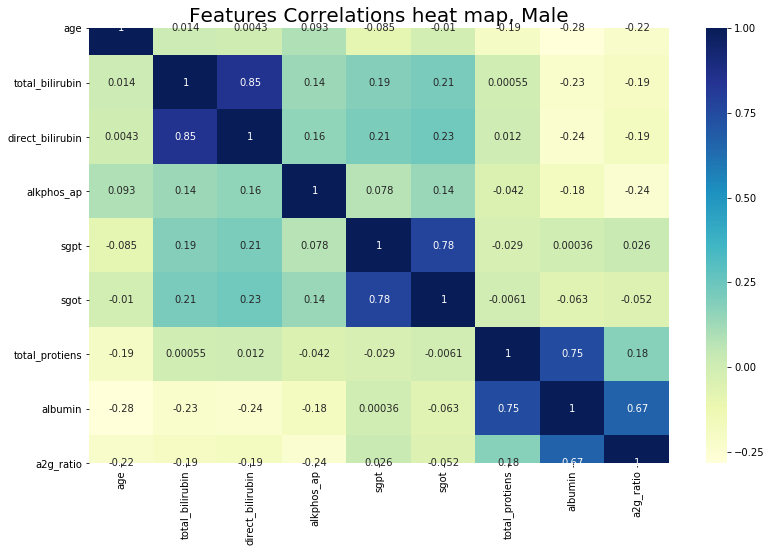

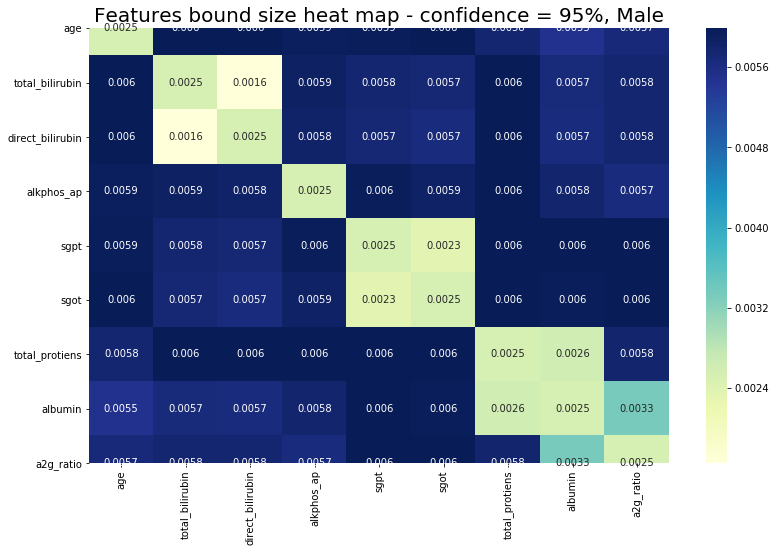

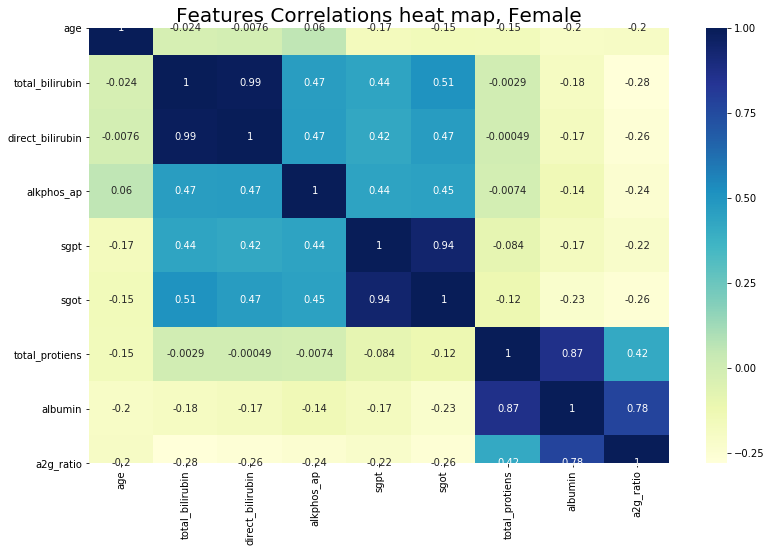

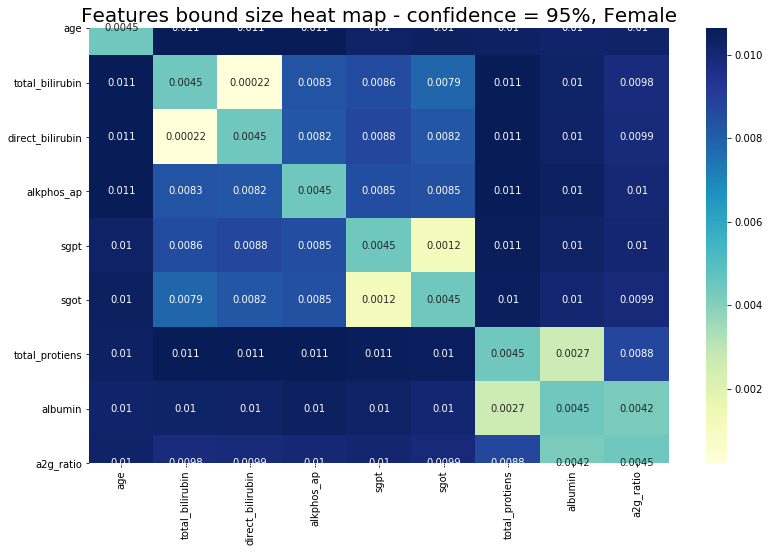

In [12]:
# define male df & female df:
df_male = df[df['gender']=='Male']
df_female = df[df['gender']=='Female']

# test features at male df:
alpha = 0.95
n = len(df_male['age'])
df_num_var = df_male[numerical_feature]
corr_mat_pearson = df_male[numerical_feature].corr(method='pearson')
plt.figure(figsize=(13,8))
sns.heatmap(corr_mat_pearson, cmap="YlGnBu", annot=True)
plt.title('Features Correlations heat map, Male', fontsize=20)
plt.show()

bound_value = (1/(np.sqrt(n-3)))*scipy.stats.norm.ppf((1-(0.5*alpha)))
f_corr_mat = corr_mat_pearson*0
for feature in (numerical_feature):
    for test_feature in (numerical_feature):
        f_corr_mat.loc[feature,test_feature] = fisher_transform(corr_mat_pearson.loc[feature,test_feature])

bound_size_mat = corr_mat_pearson*0
for feature in (numerical_feature):
    for test_feature in (numerical_feature):
        high_b = inv_fisher_transform(f_corr_mat.loc[feature,test_feature] + bound_value)
        low_b = inv_fisher_transform(f_corr_mat.loc[feature,test_feature] - bound_value)
        bound_size_mat.loc[feature,test_feature] = high_b-low_b
        
        
plt.figure(figsize=(13,8))
sns.heatmap(bound_size_mat, cmap="YlGnBu", annot=True)
plt.title('Features bound size heat map - confidence = 95%, Male', fontsize=20)
plt.show()



# test features at female df:
alpha = 0.95
n = len(df_female['age'])
df_num_var = df_female[numerical_feature]
corr_mat_pearson = df_female[numerical_feature].corr(method='pearson')
plt.figure(figsize=(13,8))
sns.heatmap(corr_mat_pearson, cmap="YlGnBu", annot=True)
plt.title('Features Correlations heat map, Female', fontsize=20)
plt.show()

bound_value = (1/(np.sqrt(n-3)))*scipy.stats.norm.ppf((1-(0.5*alpha)))
f_corr_mat = corr_mat_pearson*0
for feature in (numerical_feature):
    for test_feature in (numerical_feature):
        f_corr_mat.loc[feature,test_feature] = fisher_transform(corr_mat_pearson.loc[feature,test_feature])

bound_size_mat = corr_mat_pearson*0
for feature in (numerical_feature):
    for test_feature in (numerical_feature):
        high_b = inv_fisher_transform(f_corr_mat.loc[feature,test_feature] + bound_value)
        low_b = inv_fisher_transform(f_corr_mat.loc[feature,test_feature] - bound_value)
        bound_size_mat.loc[feature,test_feature] = high_b-low_b
        
        
plt.figure(figsize=(13,8))
sns.heatmap(bound_size_mat, cmap="YlGnBu", annot=True)
plt.title('Features bound size heat map - confidence = 95%, Female', fontsize=20)
plt.show()

* pairs that significantly correlated in healthy pop but not in disease pop / Opposite:

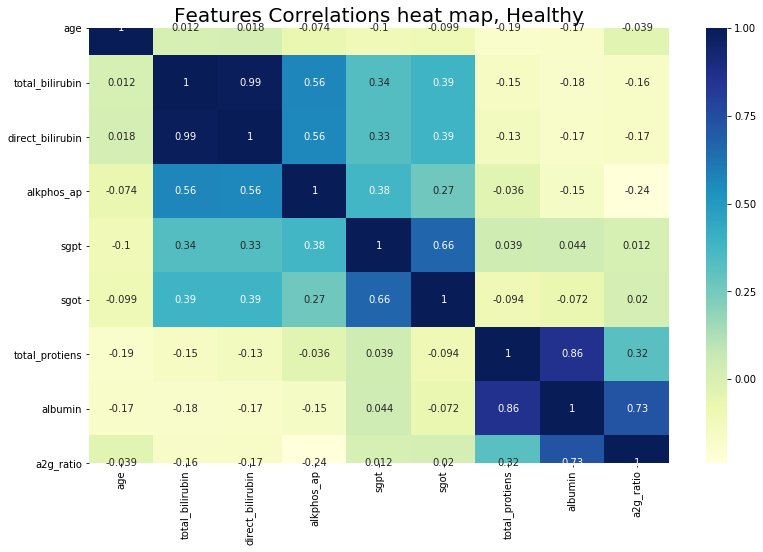

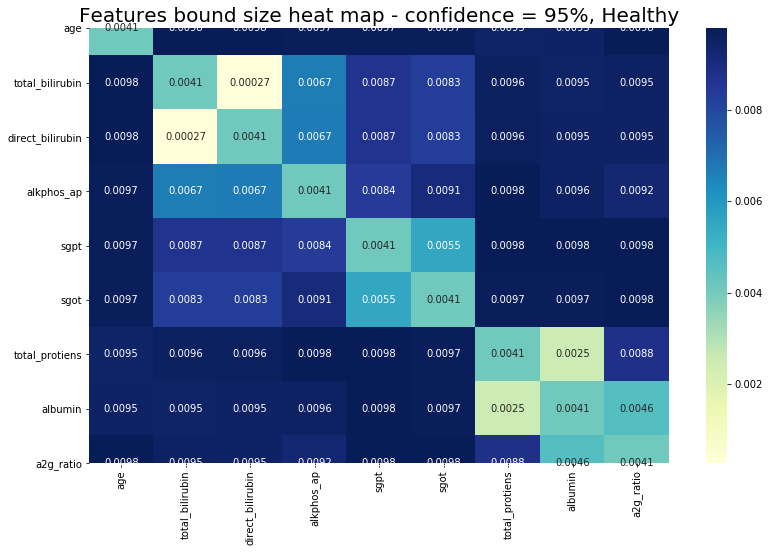

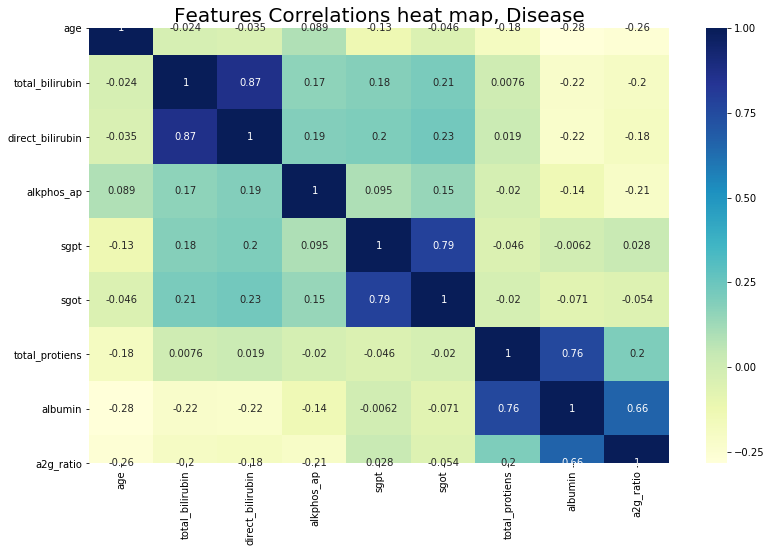

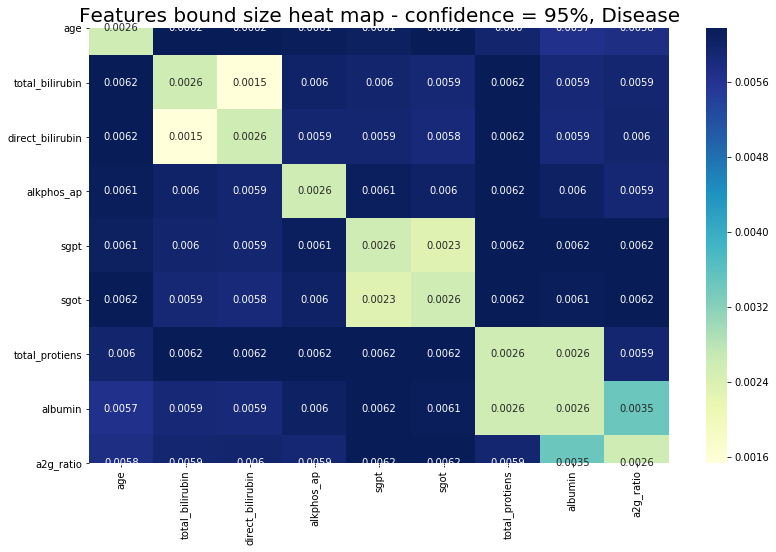

In [13]:
# define healthy df & disease df:
df_healthy = df[df['is_liver_patient']==0]
df_disease = df[df['is_liver_patient']==1]

# test features at healthy df:
alpha = 0.95
n = len(df_healthy['age'])
df_num_var = df_healthy[numerical_feature]
corr_mat_pearson = df_healthy[numerical_feature].corr(method='pearson')
plt.figure(figsize=(13,8))
sns.heatmap(corr_mat_pearson, cmap="YlGnBu", annot=True)
plt.title('Features Correlations heat map, Healthy', fontsize=20)
plt.show()

bound_value = (1/(np.sqrt(n-3)))*scipy.stats.norm.ppf((1-(0.5*alpha)))
f_corr_mat = corr_mat_pearson*0
for feature in (numerical_feature):
    for test_feature in (numerical_feature):
        f_corr_mat.loc[feature,test_feature] = fisher_transform(corr_mat_pearson.loc[feature,test_feature])

bound_size_mat = corr_mat_pearson*0
for feature in (numerical_feature):
    for test_feature in (numerical_feature):
        high_b = inv_fisher_transform(f_corr_mat.loc[feature,test_feature] + bound_value)
        low_b = inv_fisher_transform(f_corr_mat.loc[feature,test_feature] - bound_value)
        bound_size_mat.loc[feature,test_feature] = high_b-low_b
        
        
plt.figure(figsize=(13,8))
sns.heatmap(bound_size_mat, cmap="YlGnBu", annot=True)
plt.title('Features bound size heat map - confidence = 95%, Healthy', fontsize=20)
plt.show()



# test features at disease df:
alpha = 0.95
n = len(df_disease['age'])
df_num_var = df_disease[numerical_feature]
corr_mat_pearson = df_disease[numerical_feature].corr(method='pearson')
plt.figure(figsize=(13,8))
sns.heatmap(corr_mat_pearson, cmap="YlGnBu", annot=True)
plt.title('Features Correlations heat map, Disease', fontsize=20)
plt.show()

bound_value = (1/(np.sqrt(n-3)))*scipy.stats.norm.ppf((1-(0.5*alpha)))
f_corr_mat = corr_mat_pearson*0
for feature in (numerical_feature):
    for test_feature in (numerical_feature):
        f_corr_mat.loc[feature,test_feature] = fisher_transform(corr_mat_pearson.loc[feature,test_feature])

bound_size_mat = corr_mat_pearson*0
for feature in (numerical_feature):
    for test_feature in (numerical_feature):
        high_b = inv_fisher_transform(f_corr_mat.loc[feature,test_feature] + bound_value)
        low_b = inv_fisher_transform(f_corr_mat.loc[feature,test_feature] - bound_value)
        bound_size_mat.loc[feature,test_feature] = high_b-low_b
        
        
plt.figure(figsize=(13,8))
sns.heatmap(bound_size_mat, cmap="YlGnBu", annot=True)
plt.title('Features bound size heat map - confidence = 95%, Disease', fontsize=20)
plt.show()

#### For each numerical feature I ploted the distribution for this feature against bins of age. In each bin I provided a split violin plot, with different colors for healthy and disease.

C:\Users\ohad\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\ohad\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ohad\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\ohad\Anaconda3\lib\site-packages\ip

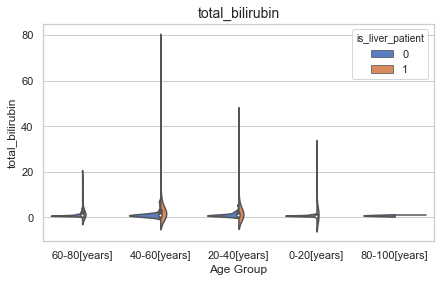

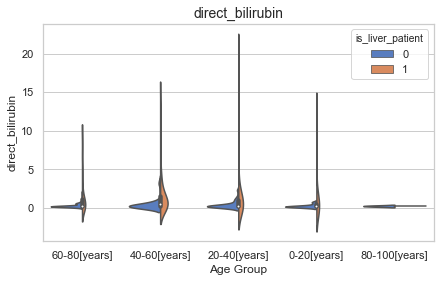

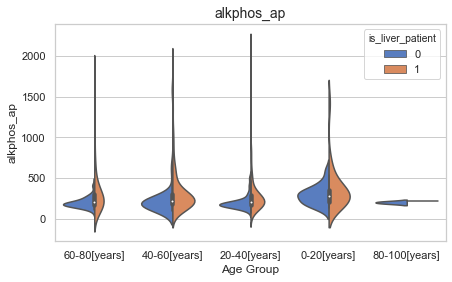

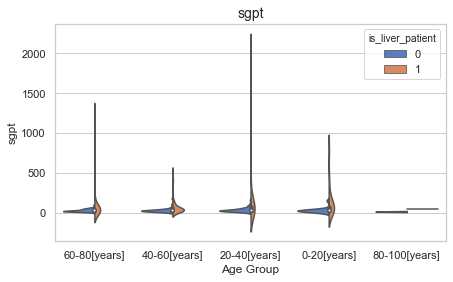

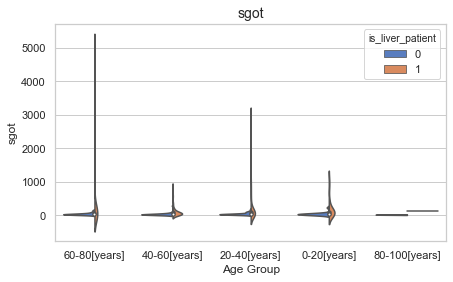

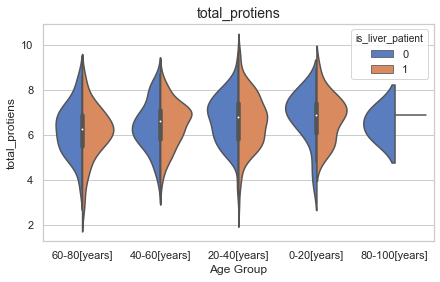

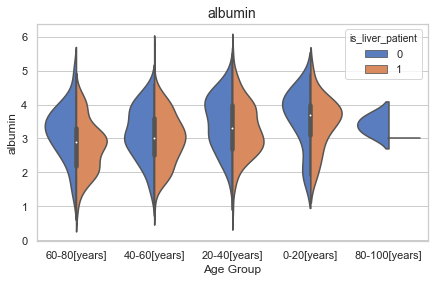

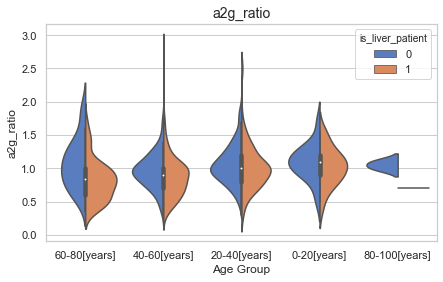

In [14]:
age_for_plot = ['0-20[years]', '20-40[years]', '40-60[years]', '60-80[years]', '80-100[years]']
age_bins = [0,20,40,60,80,100]

df_age_group = df
index_upto20 = df_age_group[df_age_group['age'] <= 20].index
index_20to40 = df_age_group[(df_age_group['age'] <= 40) & (df_age_group['age'] > 20)].index
index_40to60 = df_age_group[(df_age_group['age'] <= 60) & (df_age_group['age'] > 40)].index
index_60to80 = df_age_group[(df_age_group['age'] <= 80) & (df_age_group['age'] > 60)].index
index_80to100 = df_age_group[(df_age_group['age'] <= 100) & (df_age_group['age'] > 80)].index

# add series of age group to the DF which contains the suitable age group number:
df_age_group['Age Group'] = 0
df_age_group['Age Group'][index_upto20] = age_for_plot[0]
df_age_group['Age Group'][index_20to40] = age_for_plot[1]
df_age_group['Age Group'][index_40to60] = age_for_plot[2]
df_age_group['Age Group'][index_60to80] = age_for_plot[3]
df_age_group['Age Group'][index_80to100] = age_for_plot[4]

split_features = ['total_bilirubin', 'direct_bilirubin', 'alkphos_ap', 'sgpt', 'sgot','total_protiens', 'albumin','a2g_ratio']
for i in range(len(split_features)):     # for each feature
    curr_feature = split_features[i]     # current iteration feature
    plt.figure(figsize=(7,4))
    sns.set(style="whitegrid")
    ax = sns.violinplot(x='Age Group', y=curr_feature, hue='is_liver_patient',  data=df_age_group, palette="muted", split=True)
    plt.title(curr_feature, fontsize=14)

Comparation - Graphically IQR of liver patient age - Male Vs. Female:

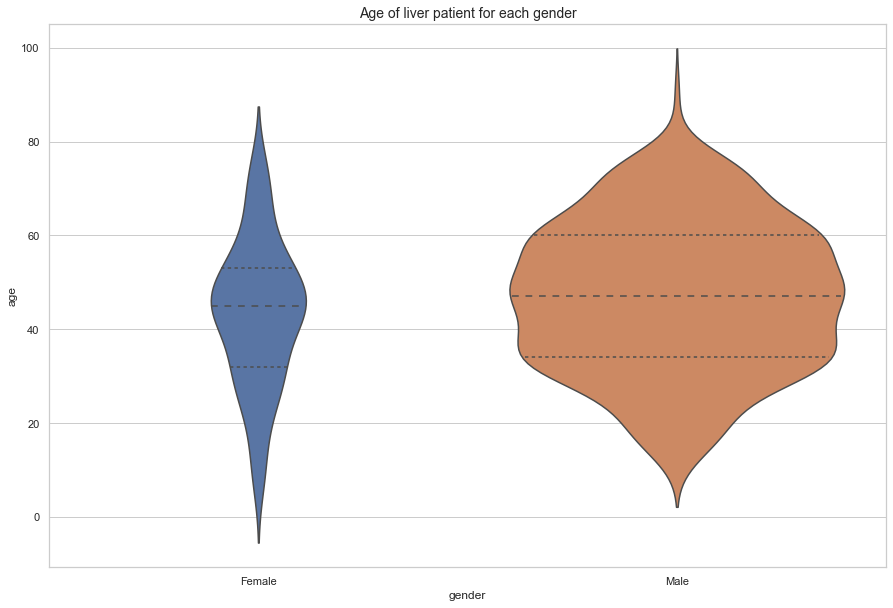

In [15]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
plt.title('Age of liver patient for each gender', fontsize=14)
ax = sns.violinplot(x='gender', y='age', data=df_disease,split=True, scale="count", inner="quartile")

* Although there is more Male patient than Female patient, we can see that the ages IQR's are similar for male pateints and for female patiens.